## 異常検知の基本的な考え方
正常となるモデルをデータから作り、そのモデルから外れる(閾値を超える)ものを異常とすること

観測値$\boldsymbol{x}^{'}$についての一つの自然な異常値$a(\boldsymbol{x}^{'})$として  
$$
    a(\boldsymbol{x}^{'}) = -Inp(\boldsymbol{x}^{'})
$$  
$In$は自然対数で、マイナスがついていることから出現率が小さいところに来た観測値に、高い異常度が与えられるということを表現しています。  
一般に、確率分布の引数に観測値を代入したものを『尤度(ゆうど)』といいます。

In [2]:
import math
import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt

**確率(密度)分布**  
ここでは、ガウス分布(正規分布)を定義します。

In [3]:
#1次元正規分布の確率密度を返す関数
def gaussian_1dim(x, mu, sigma):
    return norm.pdf((x-mu)/sigma) / sigma

$\mu$(ミュー: mu), $\sigma$(シグマ: sigma)はそれぞれ、『母平均』, 『母分散』を表しています。  
  
母集団全体の平均が、母平均。  
サンプルの平均が標本平均です。

例えば、日本人の身長の平均を考えてみます。  
日本人全員の身長を調べるのは一般的には無理なので、ランダムに100人分のデータを選択しておおよその日本人全体の平均を考える、  
ということをします。(100人が妥当かどうかは、統計的に判断します)    
この例で言えば、日本人全員を母集団といい、この日本人全員の身長の平均を母平均と言います。  

また、サンプルの平均（この例の場合、取ってきた100 人の身長の平均）を標本平均、またはサンプル平均と言います。  

母集団を固定すると、  
母平均は１つの確定した値になりますが、標本平均はサンプリングの方法(この例の場合、どの100人をどのように選ぶか)に依存します。

In [5]:
mu = 1
sigma = 0.5

x = np.linspace(mu-3*sigma, mu+3*sigma, 100)
y = gaussian_1dim(x, mu, sigma)

np.linspace→第一引数startに最初の値、第二引数stopに最後の値、第三引数numに要素数を指定する。  
それらの引数に応じた間隔（公差）が自動的に算出してくれる、便利なNumpyのモジュールです。

In [6]:
# 5%部分を表示するため
x0 = np.linspace(mu-3*sigma, mu + norm.ppf(0.025)*sigma, 20)
y0 = norm.pdf((x0-mu)/sigma) / sigma
x1 = np.linspace(mu+sigma*norm.ppf(1-0.025), mu+3*sigma, 20)
y1 = norm.pdf((x1-mu)/sigma) / sigma

norm.ppf → scipy.statsの一つのモジュール。期待値loc(=0)，標準偏差scale(=1)の正規分布のパーセント点関数の$q=0.025$での値を取得します。
ここでは、正規分布の両端2.5％ずつを色分けするために設定しています

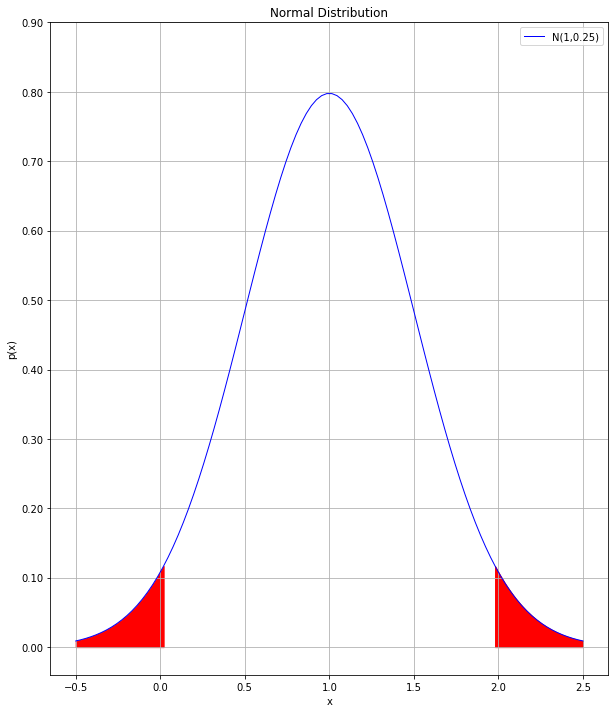

In [9]:
# 確率密度分布
fig = plt.figure(figsize=(10,12))
ax = fig.add_subplot(111)
ax.grid()
ax.plot(x, y,'-', color='blue', linewidth=1.0, label="N("+str(mu) + "," + str(sigma**2) + ")")
ax.fill_between(x0,y0,'-', color='red')
ax.fill_between(x1,y1,'-', color='red')
ax.set_title("Normal Distribution")
yticks = np.arange(0.0, 1.0, 0.1)
yticklabels = ["%.2f" % x for x in yticks]
ax.set_yticks(yticks)
ax.set_yticklabels(yticklabels)
ax.legend()
ax.set_xlabel('x')
ax.set_ylabel('p(x)')
plt.show()

In [10]:
# 異常度の定義
def func_anomary(p):
    return [- math.log(ele) for ele in p]

$a(\boldsymbol{x}^{'}) = -Inp(\boldsymbol{x}^{'})$  をプログラムとして準備

In [11]:
y

array([0.0088637 , 0.01061158, 0.01265755, 0.01504265, 0.01781164,
       0.021013  , 0.02469887, 0.02892483, 0.03374966, 0.03923492,
       0.04544446, 0.05244378, 0.06029923, 0.06907714, 0.07884274,
       0.08965899, 0.10158529, 0.11467601, 0.12897904, 0.14453415,
       0.16137142, 0.17950955, 0.19895428, 0.21969684, 0.24171251,
       0.26495935, 0.2893771 , 0.31488638, 0.3413881 , 0.36876328,
       0.39687319, 0.42555986, 0.45464701, 0.48394145, 0.5132348 ,
       0.5423057 , 0.57092233, 0.59884537, 0.62583111, 0.651635  ,
       0.67601518, 0.69873628, 0.71957312, 0.73831444, 0.75476646,
       0.76875617, 0.78013441, 0.78877847, 0.79459432, 0.79751831,
       0.79751831, 0.79459432, 0.78877847, 0.78013441, 0.76875617,
       0.75476646, 0.73831444, 0.71957312, 0.69873628, 0.67601518,
       0.651635  , 0.62583111, 0.59884537, 0.57092233, 0.5423057 ,
       0.5132348 , 0.48394145, 0.45464701, 0.42555986, 0.39687319,
       0.36876328, 0.3413881 , 0.31488638, 0.2893771 , 0.26495

In [12]:
# 異常度の計算
a = func_anomary(y)
print(a)

[4.725791352644728, 4.5458097181176385, 4.369501178172736, 4.196865732810017, 4.027903382029485, 3.8626141258311377, 3.700997964214975, 3.543054897180999, 3.3887849247292086, 3.2381880468596034, 3.091264263572184, 2.9480135748669487, 2.8084359807439, 2.672531481203037, 2.5403000762443595, 2.4117417658678675, 2.286856550073561, 2.16564442886144, 2.0481054022315046, 1.934239470183754, 1.824046632718189, 1.71752688983481, 1.614680241533616, 1.515506687814608, 1.420006228677785, 1.328178864123148, 1.2400245941506962, 1.1555434187604297, 1.074735337952349, 0.9976003517264539, 0.9241384600827437, 0.8543496630212195, 0.7882339605418807, 0.7257913526447274, 0.6670218393297594, 0.6119254205969771, 0.5605020964463803, 0.5127518668779686, 0.4686747318917428, 0.4282706914877024, 0.3915397456658476, 0.3584818944261781, 0.3290971377686943, 0.30338547569339586, 0.28134690820028285, 0.2629814352893553, 0.24828905696061343, 0.23726977321405693, 0.22992358404968605, 0.22625048946750045, 0.22625048946750

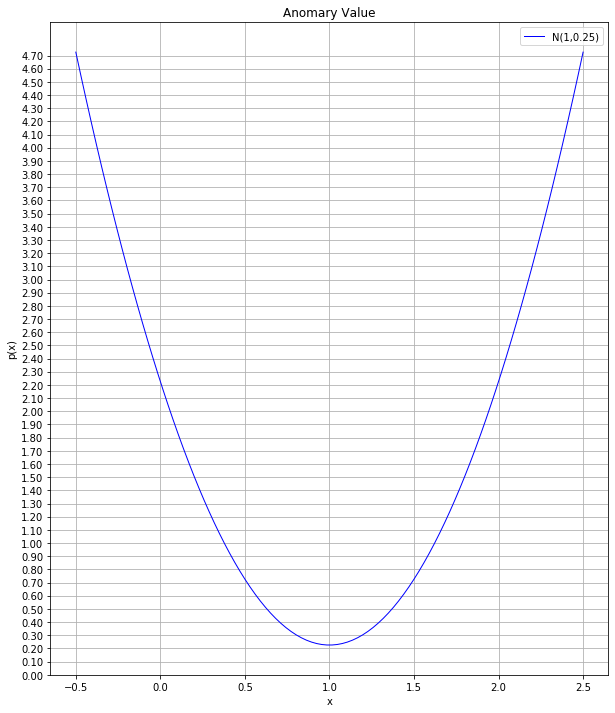

In [13]:
# 確率密度分布
fig = plt.figure(figsize=(10,12))
ax = fig.add_subplot(111)
ax.grid()
ax.plot(x, a,'-', color='blue', linewidth=1.0, label="N("+str(mu) + "," + str(sigma**2) + ")")
ax.set_title("Anomary Value")
yticks = np.arange(0.0, max(a), 0.1)
yticklabels = ["%.2f" % x for x in yticks]
ax.set_yticks(yticks)
ax.set_yticklabels(yticklabels)
ax.legend()
ax.set_xlabel('x')
ax.set_ylabel('p(x)')
plt.show()

先ほどの正規分布にしたがって、  
『出現率が低いほど、異常の程度が高い』『出現率が高いほど、異常の程度は低い』が表現されています。

### 正規分布に従うデータからの異常検知
『個々の観測データが独立に単一の正規分布に従う』と仮定できる場合の、異常検知手法を学びます。  
**『ホテリング理論』** として知られる多変量解析における『外れ値』検出手法が、本項目のメインとなります。  
  
**異常検知手順の流れ**  
0. (準備) まず、異常検知を行うためにはデータの準備が必要。ここで、データには異常な観測値が含まれていないか、含まれていたとしてもその影響は無視できるものと仮定します。
1. ステップ1(分布推定)
2. ステップ2(異常度の定義)
3. ステップ3(閾値の決定)
  
今回は統計解析等によく使われるRのデータセットから「Davis」というデータを使用します。  
このデータセットには200人分の性別、身長(実測)、体重、身長(自己申告)の4種類のデータが用意されており、  
その中から体重のデータを使用する事にします。  
**[Rdatasets](https://vincentarelbundock.github.io/Rdatasets/datasets.html)**  
  
Pandasライブラリを使って、今回扱うDavisデータの中身をみてみます。

#### 0. (準備) 

In [15]:
import pandas as pd

In [17]:
df = pd.read_csv("./DATA/Davis.csv", header=0, index_col=0)
df

,sex,weight,height,repwt,repht
1,M,77,182,77.0,180.0
2,F,58,161,51.0,159.0
3,F,53,161,54.0,158.0
4,M,68,177,70.0,175.0
5,F,59,157,59.0,155.0
...,...,...,...,...,...
196,M,74,175,71.0,175.0
197,M,83,180,80.0,180.0
198,M,81,175,NaN,NaN
199,M,90,181,91.0,178.0


このデータには、性別、身長(実測)、体重、身長(自己申告)  
という４つのデータが$N=200$人にわたり記録されています。このうちの体重に注目します。  
この200人について、みていきます。

In [18]:
import numpy as np
import matplotlib.pyplot as plt
import csv
from statistics import mean, variance
from scipy import stats

In [19]:
# データセットの読み込み
num = []
data = []
with open('./DATA/Davis.csv', 'r', encoding="utf-8") as f:
    reader = csv.reader(f)
    header = next(reader)

    for row in reader:
        num.append(int(row[0]))  #標本番号を取得
        data.append(int(row[2])) #体重データを取得

フワッと可視化してみます。

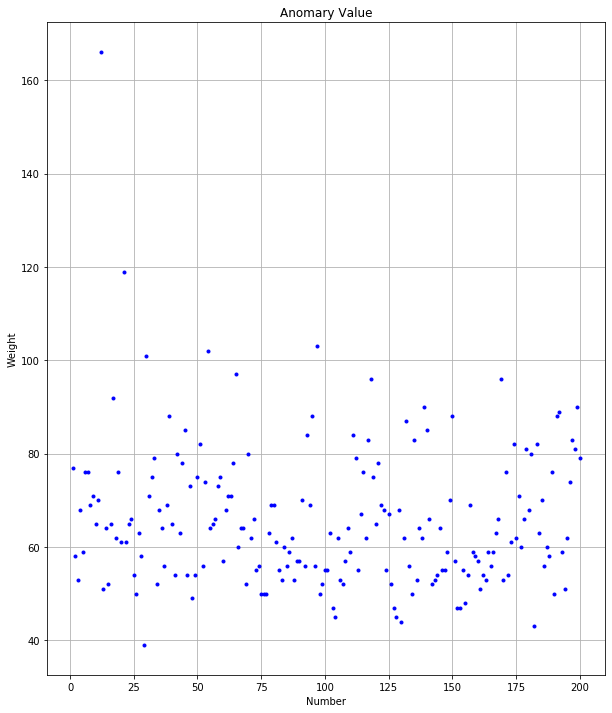

In [20]:
fig = plt.figure(figsize=(10,12))
ax = fig.add_subplot(111)
ax.grid()
ax.plot(num, data, '.', color='blue', )
ax.set_title("Anomary Value")
ax.set_xlabel('Number')
ax.set_ylabel('Weight')
plt.show()

これだとなんだかよくわからないので、体重の頻度の分布をみていきたいと思います。  
collectionsというライブラリを使って、頻度を算出します。

In [21]:
import collections

In [22]:
data_freq = data

In [23]:
label = [int((i+1)*5) for i in range(36)]

※頻度といっても一つ一つのデータはユニークなデータなので、『区間』を設けます。この場合は、5kgごとに区間に分けるラベルを用意しています

In [24]:
data_new = []
for i in range(len(label)):
    for j in data_freq:
        if j >= label[i] and j<label[i+1]:
            data_new.append(label[i])

体重の値によって、ラベルごとに分けていきます。分けた結果を、data_newに格納していきます

In [25]:
len(data_new)

200

ちゃんと格納されているかdata_newの長さで、簡易に確認しています。  
collections.Counterと、most_common()で頻度も確認します。

In [28]:
c = collections.Counter(data_new)

In [29]:
c.most_common()

[(55, 36),
 (50, 33),
 (60, 31),
 (65, 27),
 (75, 17),
 (70, 13),
 (80, 13),
 (45, 8),
 (85, 8),
 (90, 3),
 (95, 3),
 (100, 3),
 (40, 2),
 (35, 1),
 (115, 1),
 (165, 1)]

In [31]:
weight_class = []
class_count = []
for i, j in c.most_common():
    weight_class.append(i)
    class_count.append(j)

区間ごとに分けた体重の、それぞれの出現数をweight_classに追加していきます。  
weight_class を可視化すると、次のようになります。

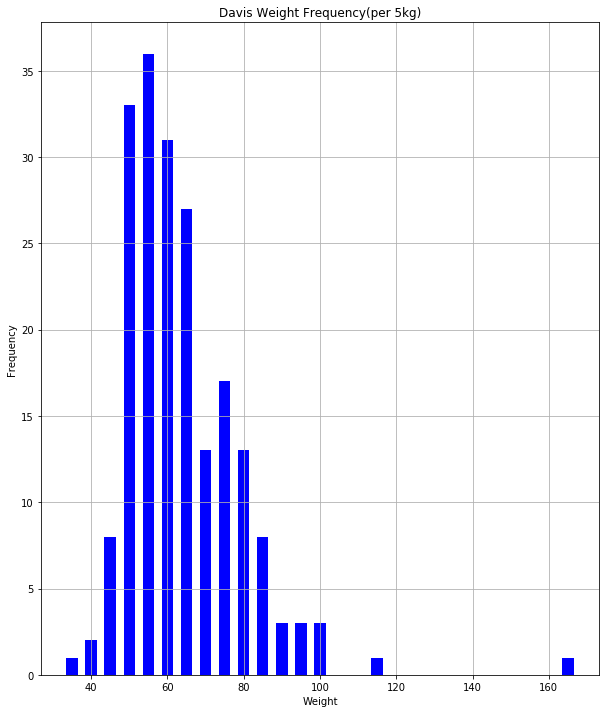

In [32]:
fig = plt.figure(figsize=(10,12))
ax = fig.add_subplot(111)
ax.grid()
ax.bar(weight_class, class_count, width=3, color='blue', )
ax.set_title("Davis Weight Frequency(per 5kg)")
ax.set_xlabel('Weight')
ax.set_ylabel('Frequency')
plt.show()

#### 1.分布推定
読み込んだ、Davisデータのうち、体重のみの平均と分散を計算します

In [116]:
# 標本平均
mean = mean(data)
# 標本分散
variance = variance(data)

#### 2. 異常度の定義
一つ一つの体重$x$に対して、異常度であるanomaly_score = $(x - mean)^2 / variance$を算出させています。  
算出させたら、anomaly_scoresに順次格納させています。

In [117]:
# 異常度
anomaly_scores = []
for x in data:
    anomaly_score = (x - mean)**2 / variance
    anomaly_scores.append(anomaly_score)

#### 3. 閾値の決定
ここでは、stats.chi2.intervalというモジュールを利用します。  
今回は、カイ２乗分布における上位1％を『異常』と仮定したときの、閾値はいくつかを算出させています。

In [118]:
# カイ二乗分布による1%水準の閾値
threshold = stats.chi2.interval(0.99, 1)[1]

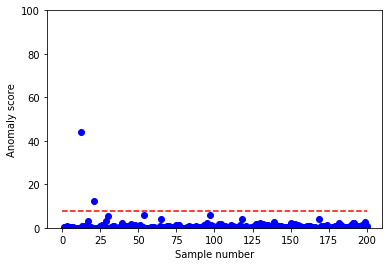

In [119]:
# 異常度のプロット、結果の描画
plt.plot(num, anomaly_scores, "o", color = "b")
plt.plot([0,200],[threshold, threshold], 'k-', color = "r", ls = "dashed")
plt.xlabel("Sample number")
plt.ylabel("Anomaly score")
plt.ylim([0,100])
plt.show()

### とにかくプログラムコードであっさりやっていきました
ので、ここからは少しだけ理論的な話をします。  
#### 1. 分布推定
さっき図示した、"Davis Weight Frequency(per 5kg)"のデータを、一つの確率分布という形で『要約』することを考えましょう。  
"Davis Weight Frequency(per 5kg)"によれば、頻度の分布は、若干左右非対称ですが、おおむねひと山の形になっています。  
この山を表現する確率分布はいろいろ考えられますが、まずは正規分布に当てはめるとします。  
確率変数を$x$としたとき、平均$\mu$, 分散$\sigma^2$ をもつ正規分布 $N(x|\mu, \sigma)$は、
$$
N(x|\mu, \sigma) \equiv \frac{1}{(2\pi\sigma^2)^\frac{1}{2}}exp\left\{-\frac{1}{(2\sigma^2)^2}(x - \mu)^2\right\}
$$
ここで、≡は右辺の内容で左辺を定義するという意味で使います。  
何もこのような複雑な式で表現しなくても...と思いますが、一言でいえば、  
正規分布とは、平均と分散が固定されたときに、最も自然で偏見の少ない分布といえます。(一方、現実問題のデータはカオスで荒々しいです。)  
  
このような確率分布に含まれるパラメータ 平均$\mu$, 分散$\sigma^2$はデータから決めるべきパラメータで、そのパラメータを求めるのに
**『最尤推定』** という手法で決定するのが一般的です。  
$$
\hat{\mu} = \frac{1}{N}\sum_{n=1}^{N} x^{(n)}
$$
$$
\hat{\sigma}^{2} = \frac{1}{N}\sum_{n=1}^{N} \left(x^{(n)} - \hat{\mu}\right)^2
$$
ここで、文字の上に ^がありますが、これを"ハット"と呼びます。データから推定した値のことを表現しています。  
最初の式は、**標本平均**といいます。「全部を足して個数で割る」ということを表現しているので、文字通り平均となります。  
2番目の式については、**標本分散**といい、「平均値からのずれの２乗」について平均しています。要は、平均値からのずれの大きさを指標としています。  
分散という言葉は、平均値からのばらつきの大きさ、という意味です。  
これらを、正規分布の式に入れることで、予測分布、つまり、ここでは任意の誰かの体重を測定したときにどのような値をとるかの確率を表すモデル  
が、$N(x|\hat{\mu}, \hat{\sigma}^2)$のように与えられます。
#### 2. 異常度の定義
ある観測値$\boldsymbol{x}^{'}$がどのくらいの異常かを表す値$a(\boldsymbol{x}^{'})$, すなわち異常度を定義していきます。  
このノートブック冒頭でも触れたように、負の対数尤度を異常度として用いることにします。先ほどの正規分布の式に対数をとると次の式が得られます。 
$$
\frac{1}{2}\hat{\sigma}^2 \left(x^{'} - \hat{\mu} \right)^{2} + \frac{1}{2} In \left(2\pi \hat{\sigma}^{2} \right)
$$
となりますが、第２項の $1/2 In \left(2\pi \hat{\sigma}^{2} \right)$は観測値$\boldsymbol{x}^{'}$に依存しないので無視して、  
次の式の形のようになります。(きれいにするため、２をかけてます)  
$$
a(\boldsymbol{x}^{'}) \equiv \frac{1}{\hat{\sigma}^2} \left(x^{'} - \hat{\mu} \right)^{2} = \left(x^{'} - \hat{\mu} \right)^{2}
$$
これが、異常度として定義できたことになります。  
  
この式を直感的に解釈すると...  
「中心から離れれば離れるほど、異常度が高い」となりませんか？！  
この直感が、今後、この勉強会であらゆるところに活きてきます。  
  
ちなみに、この式の分母の$\hat{\sigma}$は標本分散の平方根、すなわち標準偏差です。偏差で割るということは、  
もともとばらつきが大きい場合は、多少の外れは多めにみましょうね、ほとんどばらつきのないデータはちょっとの外れでも問題視しましょうね、  
という気持ちが込められています。  
#### 3. 閾値の決定
任意の観測値$\boldsymbol{x}^{'}$に対して異常度は計算することが可能になりました。  
次に、閾値を決める必要があります。ここで、分位点(よんぶんのいち、へいきん、的なやつ)により異常度に閾値を設定するのが簡単ですが、  
せっかく観測点が正規分布をなすという仮定のもとでお話ししているので、もう少し理論的に閾値を設定できそうです。  
なぜなら、異常度$a(\boldsymbol{x}^{'})$の確率分布を明示的に求めることができるから、です。  
ここで、$F$分布と**カイ二乗分布**という二つの確率分布を導入します。※詳細は省きます(大学院数学以上に知識が必要となるため)  
  
アイデアのみ書きます。  
確率分布が定義できるということは、実は$a(\boldsymbol{x}^{'})$はバラつく可能性があることを示唆しています。  
その原因は二つあります。一つは、当然ながら、今観測した値$\boldsymbol{x}^{'}$のばらつきそのものです。  
もう一つは、$\hat{\mu}$と$\hat{\sigma}^2$の推定に用いたデータ$D$のばらつきです。  
例えば、ある年のクラスに、たまたま相撲部やレスリング部、ラグビー部のフロント連中が多く集まっていて最尤推定値が例年とは比較にならないほど、  
ずれていた場合です。もしくはずれている場合です。  
データ$D$に含まれる標本の個数が有限である限り、(逆に無限であれば無視できますが現実はそうではないですよね)  
このような危険性はいつでもどこでもあります。  
正規分布の仮定に基づくて異常度の確率分布をどのように導くかは、統計学における外れ値検出理論のすべてと言っても過言ではなく、  
それを詳細に学ぶことは、より高度な手法を考える際の基礎力となります。  
  
(ホテリング統計量の分布(1変数))  
１次元の観測データ$D=\{x^{(1)}, x^{(2)}, ... , x^{(N)}\}$の各観測値が独立に同じ分布$N(\mu, \sigma^2)$に従い、  
新たな観測点$x^{'}$も同じ分布に独立に従うとする。このとき、$a(\boldsymbol{x}^{'})$の定数倍は、自由度$(1, N-1)$のF分布に従う。  
すなわち、  
$$
\frac{N-1}{N+1}a{'} \sim F(1, N-1)
$$
特に, $N>>1$のときは、$a(\boldsymbol{x}^{'})$そのものが自由度1, スケール因子1のカイ二乗分布に従う:
$$
a(\boldsymbol{x}^{'}) \sim \chi ^2(1,1)
$$
  
もうこの時点で、「？？」となりますが、ひとまず上記のことを、**ホテリング統計量(ホテリングの**$T^2$**)** といいます。  
ざっくり説明すると、確率分布(この場合は、異常度) $a(\boldsymbol{x}^{'})$に対して、この$a(\boldsymbol{x}^{'})$は正常か異常かを判定してくれる  
「物差し」と理解してください。  
例えば、観測値$x^{'}$が$x^{'}=69.8Kg$と与えられたとき、異常度の計算をしたところ$a(\boldsymbol{x}^{'})=2.0$であったとします。  
異常判定という問題は、この値が、果たして正常時のばらつきに起因するのか、はたまたその系が異常状態に遷移したが故に生じたのかを見極める  
という問題となります。  
そのためには、$a(\boldsymbol{x}^{'})=2.0$という値が、正常時の分布に照らし合わせて、どの程度「あり得ない」のかを計算する必要があり、  
そのために、**ホテリング統計量(ホテリングの**$T^2$**)**、もっというと、カイ二乗分布を利用しているのです。(上位何%があり得ないのか)    
先ほどのプログラムでいえば、「閾値を1％値に選ぶ」というのは、「正常時には１％未満でしか起こらないくらいまれな値だから、  
きっと正常ではないのだろう」という理屈になります。